In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import datetime
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, preprocessing, cross_validation, feature_extraction
from sklearn import linear_model, svm, metrics, ensemble, neighbors, mixture, cluster
import time
from datetime import date

In [ ]:
#linearRegressionRAM - Autoregressive degree 1

In [152]:
#This is the autoregressive model of degree 1
def AutoRegressionRAM_Degree1_DatesOnly(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2.drop(acc_daily2.columns[[1,2]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'RAM Used']
    rows, cols = acc_daily2.shape
    temp=acc_daily2.loc[1:rows-1, "RAM Used"]
    temp=temp.reset_index()
    temp.drop(temp.columns[[0]], axis=1, inplace=True)
    temp.loc[rows-1] = 0
    acc_daily2['RAM Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:2]
    train_label = acc_daily2.iloc[:divider, 2]
#We have -1 below because we don't have label value for the last entry
    test_data = acc_daily2.iloc[divider:rows-1, 0:2]
    test_label = acc_daily2.iloc[divider:rows-1, 2]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    print(lr.coef_)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    mo = metrics.mean_squared_error(test_label, lr.predict(test_data))
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff-1,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=lr.predict(test_data)
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='RAM Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    plt.show()

In [147]:
#This is the autoregressive model of degree 1
def AutoRegressionCPU_Degree1_DatesOnly(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2.drop(acc_daily2.columns[[1,3]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'CPU Used']
    rows, cols = acc_daily2.shape
    temp=acc_daily2.loc[1:rows-1, "CPU Used"]
    temp=temp.reset_index()
    temp.drop(temp.columns[[0]], axis=1, inplace=True)
    temp.loc[rows-1] = 0
    acc_daily2['CPU Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:2]
    train_label = acc_daily2.iloc[:divider, 2]
    test_data = acc_daily2.iloc[divider:rows-1, 0:2]
    test_label = acc_daily2.iloc[divider:rows-1, 2]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    print(lr.coef_)
    print(lr.residues_)
    print(lr.intercept_)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    mo = metrics.mean_squared_error(test_label, lr.predict(test_data))
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff-1,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=lr.predict(test_data)
    print(prediction.head())
    print(test_data.head())
    print(test_label.head())
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='CPU Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    plt.show()

In [28]:
#This is the linear regression model (for both daily and hourly max) using just date as training and RAM value as test
def linearRegressionRAM_onlyDate(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2.drop(acc_daily2.columns[[1,2]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'RAM Used']
    rows, cols = acc_daily2.shape
#     temp=acc_daily2.loc[1:rows-1, "RAM Used"]
#     temp=temp.reset_index()
#     temp.drop(temp.columns[[0]], axis=1, inplace=True)
#     temp.loc[rows-1] = 0
#     acc_daily2['RAM Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0]
    train_label = acc_daily2.iloc[:divider, 1]
    test_data = acc_daily2.iloc[divider:rows, 0]
    test_label = acc_daily2.iloc[divider:rows, 1]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
#in converting this function from LinearRegressionRAM, I had to reshape the dataframe to make it a matrix
    lr.fit(train_data.reshape(len(train_data), 1), train_label)
    print(":::Below three values indicate coefficient, residual and intercept respectively:::")
    print(lr.coef_)
    print(lr.residues_)
    print(lr.intercept_)
    # We could print out our results
    acc = lr.score(test_data.reshape(len(test_data),1), test_label)
    pred_values = lr.predict(test_data.reshape(len(test_data),1))
    mo = metrics.mean_squared_error(test_label, pred_values)
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=pred_values
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='RAM Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    plt.show()

:::Below three values indicate coefficient, residual and intercept respectively:::
[ 0.11705961]
150432441.702
4857.15828435
R^2 metric = -0.054 		 MSE = 263904.2 
        R^2            MSE
0 -0.054455  263904.164678
R^2        -0.054455
MSE    263904.164678
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


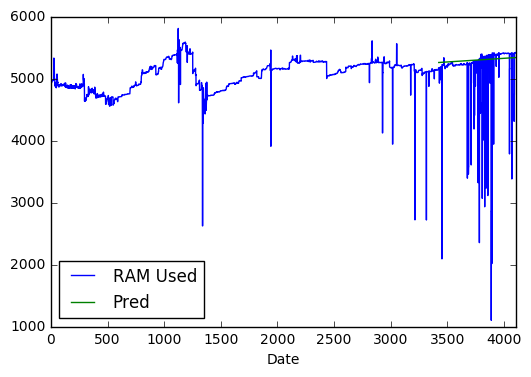

In [29]:
linearRegressionRAM_onlyDate(filename='data_files/AMD/AMD_CPU_RAM_jun2nov_hourly_data.csv')

:::Below three values indicate coefficient, residual and intercept respectively:::
[ 2.42972543]
5366889.39716
4933.5083497
R^2 metric = 0.433 		 MSE = 3131.5 
        R^2          MSE
0  0.432986  3131.546881
R^2       0.432986
MSE    3131.546881
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


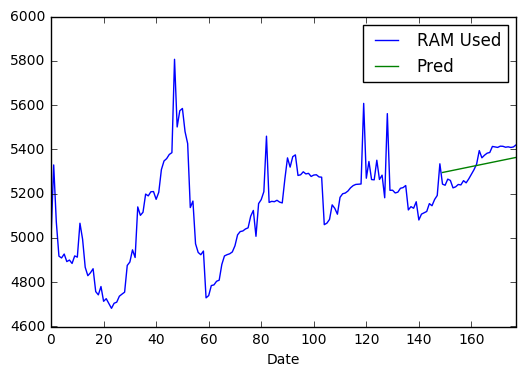

In [30]:
linearRegressionRAM_onlyDate(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

In [25]:
#This is the autoregressive model of degree 1
def linearRegressionCPU_onlyDate(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2.drop(acc_daily2.columns[[1,3]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'CPU Used']
    rows, cols = acc_daily2.shape
#     temp=acc_daily2.loc[1:rows-1, "CPU Used"]
#     temp=temp.reset_index()
#     temp.drop(temp.columns[[0]], axis=1, inplace=True)
#     temp.loc[rows-1] = 0
#     acc_daily2['CPU Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0]
    train_label = acc_daily2.iloc[:divider, 1]
    test_data = acc_daily2.iloc[divider:rows, 0]
    test_label = acc_daily2.iloc[divider:rows, 1]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data.reshape(len(train_data),1), train_label)
    print(":::Below three values indicate coefficient, residual and intercept respectively:::")
    print(lr.coef_)
    print(lr.residues_)
    print(lr.intercept_)
    # We could print out our results
    acc = lr.score(test_data.reshape(len(test_data),1) , test_label)
    pred_values = lr.predict(test_data.reshape(len(test_data),1))
    mo = metrics.mean_squared_error(test_label, pred_values)
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=pred_values
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='CPU Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    plt.show()

:::Below three values indicate coefficient, residual and intercept respectively:::
[-1.79337211]
1.62543453476e+12
131675.511509
R^2 metric = -0.039 		 MSE = 493123113.7 
        R^2           MSE
0 -0.039282  4.931231e+08
R^2   -3.928245e-02
MSE    4.931231e+08
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


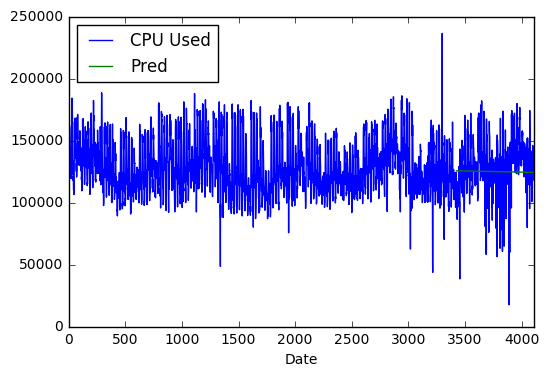

In [26]:
linearRegressionCPU_onlyDate(filename='data_files/AMD/AMD_CPU_RAM_jun2nov_hourly_data.csv')

:::Below three values indicate coefficient, residual and intercept respectively:::
[-79.64528515]
47232065792.1
165907.576755
R^2 metric = -0.360 		 MSE = 240071575.6 
        R^2           MSE
0 -0.360365  2.400716e+08
R^2   -3.603652e-01
MSE    2.400716e+08
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


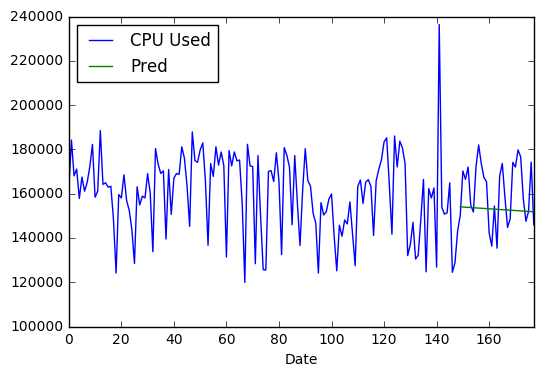

In [27]:
linearRegressionCPU_onlyDate(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

In [131]:
#This is the linear regression model (for both daily and hourly max) using just date as training and RAM value as test
def linearRegressionRAM_DateandDays(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2['Date'] = pd.to_datetime(acc_daily2['Date'])
    acc_daily2['Monday'] = (acc_daily2['Date'].dt.weekday == 0).astype(int)
    acc_daily2['Tuesday'] = (acc_daily2['Date'].dt.weekday == 1).astype(int)
    acc_daily2['Wednesday'] = (acc_daily2['Date'].dt.weekday == 2).astype(int)
    acc_daily2['Thursday'] = (acc_daily2['Date'].dt.weekday == 3).astype(int)
    acc_daily2['Friday'] = (acc_daily2['Date'].dt.weekday == 4).astype(int)
    acc_daily2['Saturday'] = (acc_daily2['Date'].dt.weekday == 5).astype(int)
    acc_daily2['Sunday'] = (acc_daily2['Date'].dt.weekday == 6).astype(int)
    acc_daily2.drop(acc_daily2.columns[[1,2]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'RAM Used', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    rows, cols = acc_daily2.shape
#     temp=acc_daily2.loc[1:rows-1, "RAM Used"]
#     temp=temp.reset_index()
#     temp.drop(temp.columns[[0]], axis=1, inplace=True)
#     temp.loc[rows-1] = 0
#     acc_daily2['RAM Next Day'] = temp
    cols=acc_daily2.columns.tolist()
    cols = cols[-7:] + cols[:2]
    acc_daily2 = acc_daily2[cols]
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:8]
    train_label = acc_daily2.iloc[:divider, 8]
    test_data = acc_daily2.iloc[divider:rows, 0:8]
    test_label = acc_daily2.iloc[divider:rows, 8]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
#in converting this function from LinearRegressionRAM, I had to reshape the dataframe to make it a matrix
    lr.fit(train_data, train_label)
    print(":::Below three values indicate coefficient, residual and intercept respectively:::")
    print(lr.coef_)
    print(lr.residues_)
    print(lr.intercept_)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    pred_values = lr.predict(test_data)
    mo = metrics.mean_squared_error(test_label, pred_values)
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=pred_values
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='RAM Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    plt.show()

:::Below three values indicate coefficient, residual and intercept respectively:::
[-21.572469   -13.56966569  -2.60628019   1.87820475  13.78353886
  20.634855     1.45181628   0.11755629]
[]
4856.53782681
R^2 metric = -0.060 		 MSE = 265238.1 
        R^2            MSE
0 -0.059785  265238.132497
R^2        -0.059785
MSE    265238.132497
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


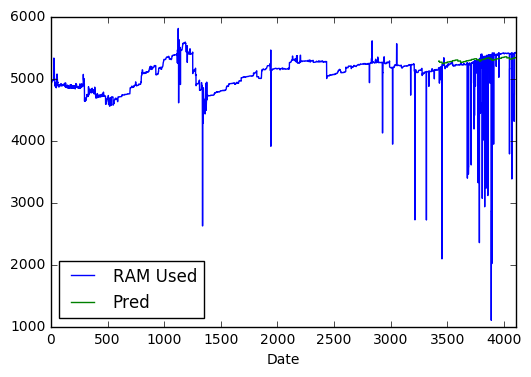

In [132]:
linearRegressionRAM_DateandDays(filename='data_files/AMD/AMD_CPU_RAM_jun2nov_hourly_data.csv')

:::Below three values indicate coefficient, residual and intercept respectively:::
[ 28.67043385 -28.30716839   0.36452016   5.5983648   32.03781067
 -10.54761793 -27.81634317   2.42616352]
[]
4933.46870376
R^2 metric = 0.367 		 MSE = 3493.9 
        R^2          MSE
0  0.367374  3493.909157
R^2       0.367374
MSE    3493.909157
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


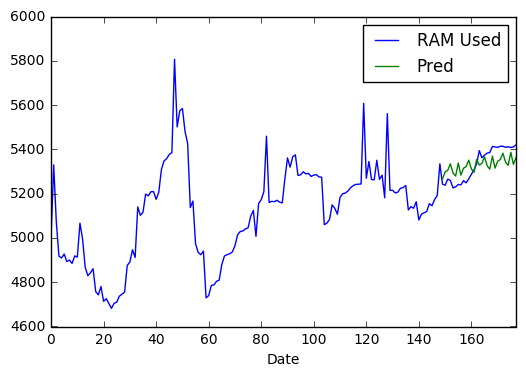

In [133]:
linearRegressionRAM_DateandDays(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

In [123]:
#This is the autoregressive model of degree 1
def linearRegressionCPU_DateAndDays(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2['Date'] = pd.to_datetime(acc_daily2['Date'])
    acc_daily2['Monday'] = (acc_daily2['Date'].dt.weekday == 0).astype(int)
    acc_daily2['Tuesday'] = (acc_daily2['Date'].dt.weekday == 1).astype(int)
    acc_daily2['Wednesday'] = (acc_daily2['Date'].dt.weekday == 2).astype(int)
    acc_daily2['Thursday'] = (acc_daily2['Date'].dt.weekday == 3).astype(int)
    acc_daily2['Friday'] = (acc_daily2['Date'].dt.weekday == 4).astype(int)
    acc_daily2['Saturday'] = (acc_daily2['Date'].dt.weekday == 5).astype(int)
    acc_daily2['Sunday'] = (acc_daily2['Date'].dt.weekday == 6).astype(int)
    acc_daily2.drop(acc_daily2.columns[[1,3]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'CPU Used', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    rows, cols = acc_daily2.shape
#     temp=acc_daily2.loc[1:rows-1, "CPU Used"]
#     temp=temp.reset_index()
#     temp.drop(temp.columns[[0]], axis=1, inplace=True)
#     temp.loc[rows-1] = 0
#     acc_daily2['CPU Next Day'] = temp
    cols=acc_daily2.columns.tolist()
    cols = cols[-7:] + cols[:2]
    acc_daily2 = acc_daily2[cols]
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:8]
    train_label = acc_daily2.iloc[:divider, 8]
    test_data = acc_daily2.iloc[divider:rows, 0:8]
    test_label = acc_daily2.iloc[divider:rows, 8]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    print(":::Below three values indicate coefficient, residual and intercept respectively:::")
    print(lr.coef_)
    print(lr.residues_)
    print(lr.intercept_)
    # We could print out our results
    acc = lr.score(test_data , test_label)
    pred_values = lr.predict(test_data)
    mo = metrics.mean_squared_error(test_label, pred_values)
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=pred_values
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='CPU Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    plt.show()

:::Below three values indicate coefficient, residual and intercept respectively:::
[  1.79192291e+03   9.53344118e+02   1.75068397e+03   1.99143910e+03
   5.38488604e+03  -6.93147569e+02  -1.11791286e+04  -1.94155337e+00]
[]
131838.4062
R^2 metric = 0.012 		 MSE = 468627070.2 
        R^2           MSE
0  0.012344  4.686271e+08
R^2    1.234423e-02
MSE    4.686271e+08
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


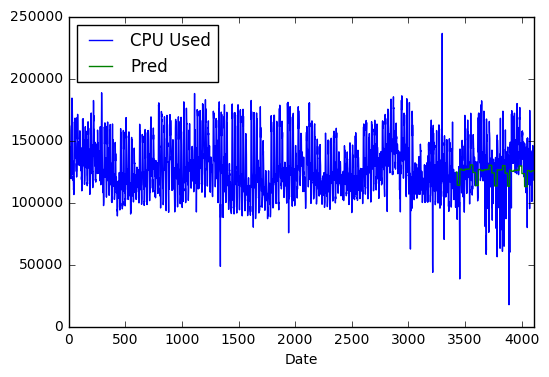

In [124]:
linearRegressionCPU_DateAndDays(filename='data_files/AMD/AMD_CPU_RAM_jun2nov_hourly_data.csv')

:::Below three values indicate coefficient, residual and intercept respectively:::
[  7969.83632783   4228.11109934   4945.69497876   4326.06937471
   8744.5370255   -5434.67058832 -24779.57821782    -82.34486867]
[]
165955.156195
R^2 metric = -0.161 		 MSE = 204931863.6 
        R^2           MSE
0 -0.161246  2.049319e+08
R^2   -1.612460e-01
MSE    2.049319e+08
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


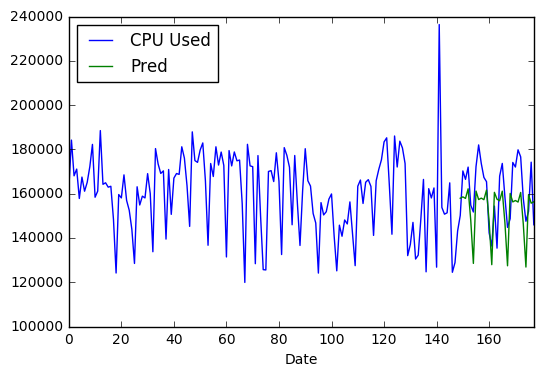

In [125]:
linearRegressionCPU_DateAndDays(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

In [135]:
#This is the autoregressive model of degree 1
def AutoRegressionRAM_Degree1_DatesAndDays(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2['Date'] = pd.to_datetime(acc_daily2['Date'])
    acc_daily2['Monday'] = (acc_daily2['Date'].dt.weekday == 0).astype(int)
    acc_daily2['Tuesday'] = (acc_daily2['Date'].dt.weekday == 1).astype(int)
    acc_daily2['Wednesday'] = (acc_daily2['Date'].dt.weekday == 2).astype(int)
    acc_daily2['Thursday'] = (acc_daily2['Date'].dt.weekday == 3).astype(int)
    acc_daily2['Friday'] = (acc_daily2['Date'].dt.weekday == 4).astype(int)
    acc_daily2['Saturday'] = (acc_daily2['Date'].dt.weekday == 5).astype(int)
    acc_daily2['Sunday'] = (acc_daily2['Date'].dt.weekday == 6).astype(int)
    acc_daily2.drop(acc_daily2.columns[[1,2]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'RAM Used', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    rows, cols = acc_daily2.shape
    temp=acc_daily2.loc[1:rows-1, "RAM Used"]
    temp=temp.reset_index()
    temp.drop(temp.columns[[0]], axis=1, inplace=True)
    temp.loc[rows-1] = 0
    acc_daily2['RAM Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:9]
    train_label = acc_daily2.iloc[:divider, 9]
#We have -1 below because we don't have label value for the last entry
    test_data = acc_daily2.iloc[divider:rows-1, 0:9]
    test_label = acc_daily2.iloc[divider:rows-1, 9]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    print(lr.coef_)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    mo = metrics.mean_squared_error(test_label, lr.predict(test_data))
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff-1,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=lr.predict(test_data)
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='RAM Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    plt.show()

[ 0.01625064  0.86171456 -3.61190436 -1.40311331  0.74525269 -1.09621427
  2.11323846  2.97796056  0.27478023]
R^2 metric = 0.147 		 MSE = 213912.3 
        R^2            MSE
0  0.146542  213912.293272
R^2         0.146542
MSE    213912.293272
dtype: float64


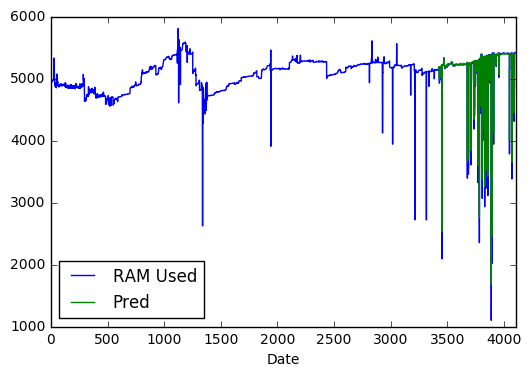

In [136]:
AutoRegressionRAM_Degree1_DatesAndDays(filename='data_files/AMD/AMD_CPU_RAM_jun2nov_hourly_data.csv')

[  0.34953805   0.85961833 -53.43485252  22.09241157   5.91978541
  17.66421554 -43.46300515  -9.87282145  61.09426659]
R^2 metric = 0.699 		 MSE = 1628.7 
        R^2          MSE
0  0.699393  1628.735393
R^2       0.699393
MSE    1628.735393
dtype: float64


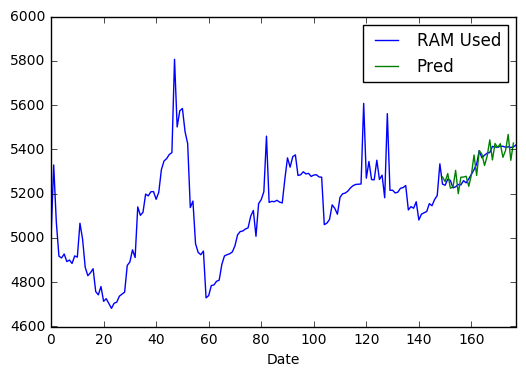

In [144]:
AutoRegressionRAM_Degree1_DatesAndDays(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

In [141]:
#This is the autoregressive model of degree 1
def AutoRegressionCPU_Degree1_DatesAndDays(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2['Date'] = pd.to_datetime(acc_daily2['Date'])
    acc_daily2['Monday'] = (acc_daily2['Date'].dt.weekday == 0).astype(int)
    acc_daily2['Tuesday'] = (acc_daily2['Date'].dt.weekday == 1).astype(int)
    acc_daily2['Wednesday'] = (acc_daily2['Date'].dt.weekday == 2).astype(int)
    acc_daily2['Thursday'] = (acc_daily2['Date'].dt.weekday == 3).astype(int)
    acc_daily2['Friday'] = (acc_daily2['Date'].dt.weekday == 4).astype(int)
    acc_daily2['Saturday'] = (acc_daily2['Date'].dt.weekday == 5).astype(int)
    acc_daily2['Sunday'] = (acc_daily2['Date'].dt.weekday == 6).astype(int)
    acc_daily2.drop(acc_daily2.columns[[1,3]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'CPU Used', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    rows, cols = acc_daily2.shape
    temp=acc_daily2.loc[1:rows-1, "CPU Used"]
    temp=temp.reset_index()
    temp.drop(temp.columns[[0]], axis=1, inplace=True)
    temp.loc[rows-1] = 0
    acc_daily2['CPU Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:9]
    train_label = acc_daily2.iloc[:divider, 9]
    test_data = acc_daily2.iloc[divider:rows-1, 0:9]
    test_label = acc_daily2.iloc[divider:rows-1, 9]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    print(lr.coef_)
    print(lr.residues_)
    print(lr.intercept_)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    mo = metrics.mean_squared_error(test_label, lr.predict(test_data))
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff-1,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=lr.predict(test_data)
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='CPU Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    plt.show()

[ -2.42016162e-01   8.75250837e-01   1.70969460e+02   3.04746162e+02
   2.41054605e+02   1.36546855e+02   2.75460910e+02  -5.07004545e+02
  -6.21773445e+02]
[]
16440.4164998
R^2 metric = 0.351 		 MSE = 308289527.3 
        R^2           MSE
0  0.350805  3.082895e+08
R^2    3.508052e-01
MSE    3.082895e+08
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


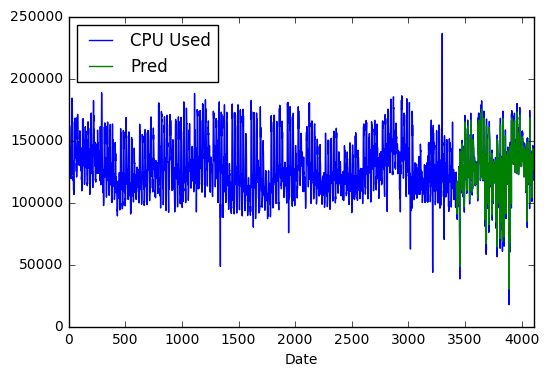

In [142]:
AutoRegressionCPU_Degree1_DatesAndDays(filename='data_files/AMD/AMD_CPU_RAM_jun2nov_hourly_data.csv')

[ -6.90084331e+01   2.77640341e-01   1.81628057e+03   4.32332219e+03
   3.06125917e+03   6.00778750e+03  -8.93743589e+03  -2.30504804e+04
   1.67792668e+04]
[]
120386.200878
R^2 metric = -0.132 		 MSE = 202056771.1 
        R^2           MSE
0 -0.132268  2.020568e+08
R^2   -1.322684e-01
MSE    2.020568e+08
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


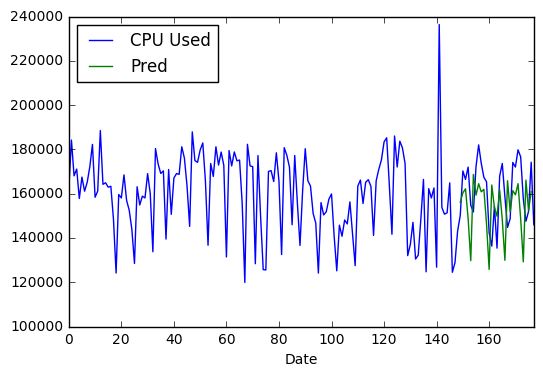

In [143]:
AutoRegressionCPU_Degree1_DatesAndDays(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

[ 0.0161138   0.86230341]
R^2 metric = 0.146 		 MSE = 213971.8 
        R^2            MSE
0  0.146304  213971.774996
R^2         0.146304
MSE    213971.774996
dtype: float64


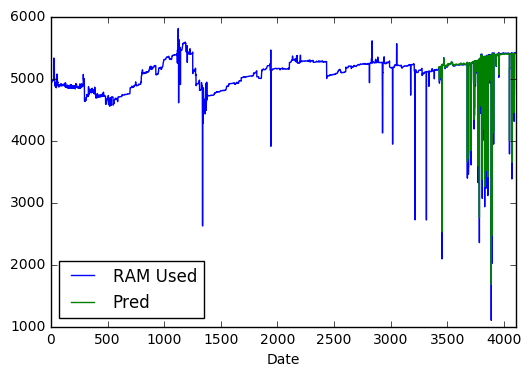

In [153]:
AutoRegressionRAM_Degree1_DatesOnly(filename='data_files/AMD/AMD_CPU_RAM_jun2nov_hourly_data.csv')

[ 0.39411595  0.83959733]
R^2 metric = 0.931 		 MSE = 372.7 
        R^2         MSE
0  0.931207  372.731962
R^2      0.931207
MSE    372.731962
dtype: float64


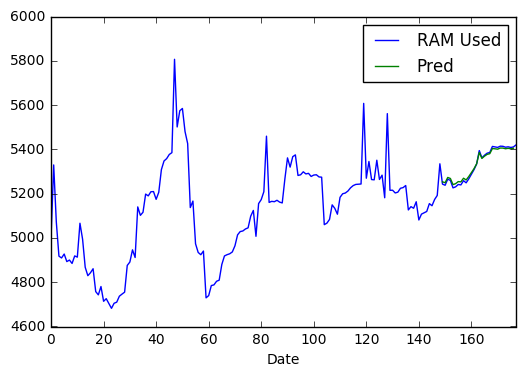

In [154]:
AutoRegressionRAM_Degree1_DatesOnly(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

[-0.21963824  0.87816576]
371983846142.0
16037.0127938
R^2 metric = 0.349 		 MSE = 309001942.5 
        R^2           MSE
0  0.349305  3.090019e+08
R^2    3.493050e-01
MSE    3.090019e+08
dtype: float64
   Date           Pred
0  3425  115909.478130
1  3426  107199.933637
2  3427   98219.175025
3  3428   96947.593365
4  3429   99061.030194
      Date     CPU Used
3425  3425  114585.1168
3426  3426  104667.4848
3427  3427   94441.0112
3428  3428   92993.2640
3429  3429   95400.1632
3425    104667.4848
3426     94441.0112
3427     92993.2640
3428     95400.1632
3429    106822.0832
Name: CPU Next Day, dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


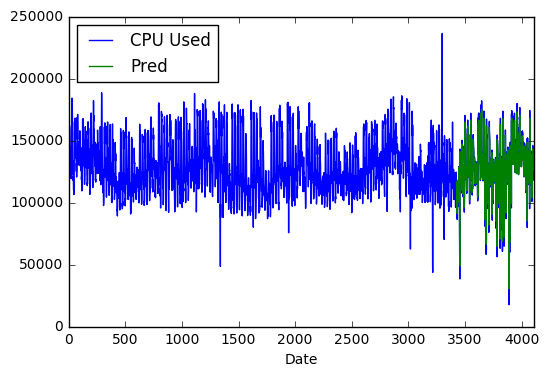

In [150]:
AutoRegressionCPU_Degree1_DatesOnly(filename='data_files/AMD/AMD_CPU_RAM_jun2nov_hourly_data.csv')

[-70.19420802   0.14484498]
46240571426.1
141950.799358
R^2 metric = -0.225 		 MSE = 218635312.1 
       R^2           MSE
0 -0.22517  2.186353e+08
R^2   -2.251699e-01
MSE    2.186353e+08
dtype: float64
   Date           Pred
0   149  153239.092729
1   150  156082.217249
2   151  155461.227416
3   152  156192.718412
4   153  153628.811876
     Date     CPU Used
149   149  150141.4176
150   150  170254.7744
151   151  166452.1184
152   152  171986.8992
153   153  154770.4768
149    170254.7744
150    166452.1184
151    171986.8992
152    154770.4768
153    151713.9424
Name: CPU Next Day, dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


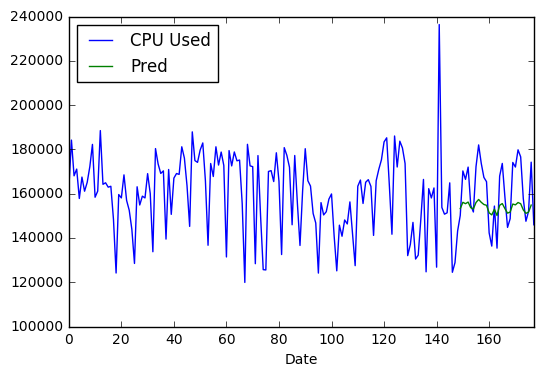

In [151]:
AutoRegressionCPU_Degree1_DatesOnly(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

In [3]:
#This is the autoregressive model of degree 1
def AutoRegressionRAM_Degree7_DatesAndDays(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2['Date'] = pd.to_datetime(acc_daily2['Date'])
    acc_daily2['Monday'] = (acc_daily2['Date'].dt.weekday == 0).astype(int)
    acc_daily2['Tuesday'] = (acc_daily2['Date'].dt.weekday == 1).astype(int)
    acc_daily2['Wednesday'] = (acc_daily2['Date'].dt.weekday == 2).astype(int)
    acc_daily2['Thursday'] = (acc_daily2['Date'].dt.weekday == 3).astype(int)
    acc_daily2['Friday'] = (acc_daily2['Date'].dt.weekday == 4).astype(int)
    acc_daily2['Saturday'] = (acc_daily2['Date'].dt.weekday == 5).astype(int)
    acc_daily2['Sunday'] = (acc_daily2['Date'].dt.weekday == 6).astype(int)
    acc_daily2.drop(acc_daily2.columns[[1,2]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'RAM Used', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    rows, cols = acc_daily2.shape
    temp1=acc_daily2.loc[0:rows-7, "RAM Used"]
    temp1=temp1.reset_index()
    temp1.drop(temp1.columns[[0]], axis=1, inplace=True)
    for i in range(172,178):
        temp1.loc[i]=0
    rows1, cols1 = temp1.shape
    for i in reversed(range(7,rows1)):
        temp1.loc[i] = temp1.loc[i-7]
    for i in range(7):
        temp1.loc[i]=0
    acc_daily2['RAM Previous Same Day'] = temp1
    temp=acc_daily2.loc[1:rows-1, "RAM Used"]
    temp=temp.reset_index()
    temp.drop(temp.columns[[0]], axis=1, inplace=True)
    temp.loc[rows-1] = 0
    acc_daily2['RAM Next Day'] = temp
    acc_daily2 = acc_daily2.loc[7:rows,:]
    acc_daily2=acc_daily2.reset_index()
    acc_daily2.drop('index',1,inplace=True)
    rows, cols=acc_daily2.shape
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:10]
    train_label = acc_daily2.iloc[:divider, 10]
#We have -1 below because we don't have label value for the last entry
    test_data = acc_daily2.iloc[divider:rows-1, 0:10]
    test_label = acc_daily2.iloc[divider:rows-1, 10]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    print(lr.coef_)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    mo = math.sqrt(metrics.mean_squared_error(test_label, lr.predict(test_data))) 
    print ("R^2 metric = %03.3f \t\t RMSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'RMSE'] = mo

    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider+7,divider+7+diff-1,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=lr.predict(test_data)
    plt.figure()

    ax=acc_daily2.plot(x='Date', y='RAM Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    plt.show()

In [2]:
AutoRegressionRAM_Degree7_DatesAndDays(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

NameError: name 'pd' is not defined

In [24]:
#This is the autoregressive model of degree 1
def AutoRegressionCPU_Degree7_DatesAndDays(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2['Date'] = pd.to_datetime(acc_daily2['Date'])
    acc_daily2['Monday'] = (acc_daily2['Date'].dt.weekday == 0).astype(int)
    acc_daily2['Tuesday'] = (acc_daily2['Date'].dt.weekday == 1).astype(int)
    acc_daily2['Wednesday'] = (acc_daily2['Date'].dt.weekday == 2).astype(int)
    acc_daily2['Thursday'] = (acc_daily2['Date'].dt.weekday == 3).astype(int)
    acc_daily2['Friday'] = (acc_daily2['Date'].dt.weekday == 4).astype(int)
    acc_daily2['Saturday'] = (acc_daily2['Date'].dt.weekday == 5).astype(int)
    acc_daily2['Sunday'] = (acc_daily2['Date'].dt.weekday == 6).astype(int)
    acc_daily2.drop(acc_daily2.columns[[1,3]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'CPU Used', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    rows, cols = acc_daily2.shape
    temp1=acc_daily2.loc[0:rows-7, "CPU Used"]
    temp1=temp1.reset_index()
    temp1.drop(temp1.columns[[0]], axis=1, inplace=True)
    for i in range(172,178):
        temp1.loc[i]=0
    rows1, cols1 = temp1.shape
    for i in reversed(range(7,rows1)):
        temp1.loc[i] = temp1.loc[i-7]
    for i in range(7):
        temp1.loc[i]=0
    acc_daily2['CPU Previous Same Day'] = temp1
    temp=acc_daily2.loc[1:rows-1, "CPU Used"]
    temp=temp.reset_index()
    temp.drop(temp.columns[[0]], axis=1, inplace=True)
    temp.loc[rows-1] = 0
    acc_daily2['CPU Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:10]
    train_label = acc_daily2.iloc[:divider, 10]
    test_data = acc_daily2.iloc[divider:rows-1, 0:10]
    test_label = acc_daily2.iloc[divider:rows-1, 10]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    print(lr.coef_)
    print(lr.residues_)
    print(lr.intercept_)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    mo = math.sqrt(metrics.mean_squared_error(test_label, lr.predict(test_data)))
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff-1,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=lr.predict(test_data)
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='CPU Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    plt.show()

[ -7.05729698e+01   2.77874446e-01   1.76516216e+03   4.29785532e+03
   3.03142267e+03   5.98450001e+03  -8.99217689e+03  -2.30353886e+04
   1.69486254e+04   6.69012519e-03]
[]
119440.478467
R^2 metric = -0.149 		 MSE = 14321.5 
        R^2           MSE
0 -0.149347  14321.468432
R^2       -0.149347
MSE    14321.468432
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


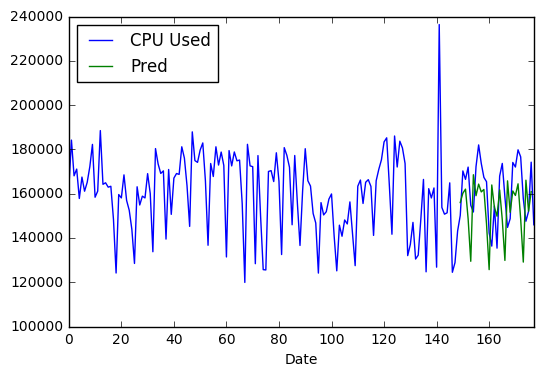

In [25]:
AutoRegressionCPU_Degree7_DatesAndDays(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

In [68]:
#This is the autoregressive model of degree 1
#Uses predicted values to generate more predicted values
def AutoRegressionRAM_Degree1_DatesAndDays_pred(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2['Date'] = pd.to_datetime(acc_daily2['Date'])
    acc_daily2['Monday'] = (acc_daily2['Date'].dt.weekday == 0).astype(int)
    acc_daily2['Tuesday'] = (acc_daily2['Date'].dt.weekday == 1).astype(int)
    acc_daily2['Wednesday'] = (acc_daily2['Date'].dt.weekday == 2).astype(int)
    acc_daily2['Thursday'] = (acc_daily2['Date'].dt.weekday == 3).astype(int)
    acc_daily2['Friday'] = (acc_daily2['Date'].dt.weekday == 4).astype(int)
    acc_daily2['Saturday'] = (acc_daily2['Date'].dt.weekday == 5).astype(int)
    acc_daily2['Sunday'] = (acc_daily2['Date'].dt.weekday == 6).astype(int)
    acc_daily2.drop(acc_daily2.columns[[1,2]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'RAM Used', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    rows, cols = acc_daily2.shape
    temp=acc_daily2.loc[1:rows-1, "RAM Used"]
    temp=temp.reset_index()
    temp.drop(temp.columns[[0]], axis=1, inplace=True)
    temp.loc[rows-1] = 0
    acc_daily2['RAM Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:9]
    train_label = acc_daily2.iloc[:divider, 9]
#We have -1 below because we don't have label value for the last entry
    test_data = acc_daily2.iloc[divider:rows-1, 0:9]
    test_label = acc_daily2.iloc[divider:rows-1, 9]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    dates=range(divider,divider+diff-1,1)
    prediction_lr=pd.DataFrame()
    prediction_lr['Date']=dates
    prediction_lr['test_data']=lr.predict(test_data)
    new_pred = predictBasedOnPreviousPrediction_RAM(test_data, lr.coef_, lr.intercept_, divider, diff)
    old_pred = lr.predict(test_data)
    mo = math.sqrt(metrics.mean_squared_error(test_label, new_pred))
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=new_pred
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='RAM Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    prediction_lr.plot(x='Date', y='test_data',ax=ax)
    plt.show()
    
def predictBasedOnPreviousPrediction_RAM(test_data, X, Y, divider, diff):
    rows, cols = test_data.shape
    dates=range(divider,divider+diff-1,1)
    prediction=pd.DataFrame(index=test_data.index)
    prediction['Date']=dates
    prediction['Pred']=0
    for i in range(divider, divider+rows):
        previousPrediction = np.dot(test_data.loc[i,], X) + Y
        prediction.loc[i, 'Pred'] = previousPrediction
        if i < divider+rows-1:
            test_data.loc[i+1, 'RAM Used'] = previousPrediction
    return prediction['Pred'].values

[  0.34953805   0.85961833 -53.43485252  22.09241157   5.91978541
  17.66421554 -43.46300515  -9.87282145  61.09426659]
693.704670594
     Date     RAM Used  Mon  Tues  Wed  Thur  Fri  Sat  Sun
149   149  5243.038412    0     1    0     0    0    0    0
150   150  5274.890151    0     0    1     0    0    0    0
151   151  5286.447402    0     0    0     1    0    0    0
152   152  5308.476194    0     0    0     0    1    0    0
153   153  5266.634866    0     0    0     0    0    1    0
R^2 metric = 0.699 		 MSE = 61.2 
        R^2        MSE
0  0.699393  61.215705
R^2     0.699393
MSE    61.215705
dtype: float64


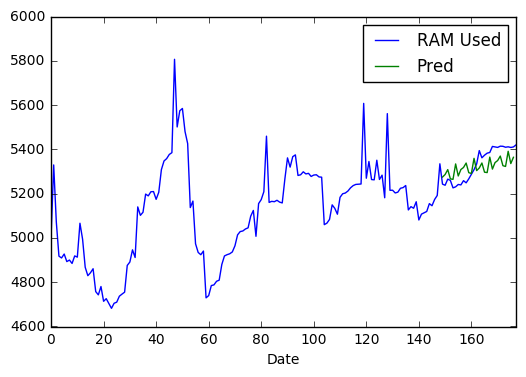

In [33]:
AutoRegressionRAM_Degree1_DatesAndDays_pred(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

R^2 metric = 0.699 		 MSE = 61.2 
        R^2        MSE
0  0.699393  61.215705
R^2     0.699393
MSE    61.215705
dtype: float64


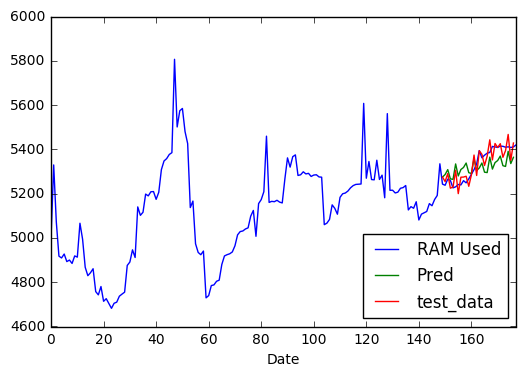

In [69]:
AutoRegressionRAM_Degree1_DatesAndDays_pred(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

In [70]:
#This is the autoregressive model of degree 1
def AutoRegressionCPU_Degree1_DatesAndDays_pred(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2['Date'] = pd.to_datetime(acc_daily2['Date'])
    acc_daily2['Monday'] = (acc_daily2['Date'].dt.weekday == 0).astype(int)
    acc_daily2['Tuesday'] = (acc_daily2['Date'].dt.weekday == 1).astype(int)
    acc_daily2['Wednesday'] = (acc_daily2['Date'].dt.weekday == 2).astype(int)
    acc_daily2['Thursday'] = (acc_daily2['Date'].dt.weekday == 3).astype(int)
    acc_daily2['Friday'] = (acc_daily2['Date'].dt.weekday == 4).astype(int)
    acc_daily2['Saturday'] = (acc_daily2['Date'].dt.weekday == 5).astype(int)
    acc_daily2['Sunday'] = (acc_daily2['Date'].dt.weekday == 6).astype(int)
    acc_daily2.drop(acc_daily2.columns[[1,3]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'CPU Used', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    rows, cols = acc_daily2.shape
    temp=acc_daily2.loc[1:rows-1, "CPU Used"]
    temp=temp.reset_index()
    temp.drop(temp.columns[[0]], axis=1, inplace=True)
    temp.loc[rows-1] = 0
    acc_daily2['CPU Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:9]
    train_label = acc_daily2.iloc[:divider, 9]
    test_data = acc_daily2.iloc[divider:rows-1, 0:9]
    test_label = acc_daily2.iloc[divider:rows-1, 9]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    print(lr.coef_)
    print(lr.residues_)
    print(lr.intercept_)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    dates=range(divider,divider+diff-1,1)
    prediction_lr=pd.DataFrame()
    prediction_lr['Date']=dates
    prediction_lr['test_data']=lr.predict(test_data)
    new_pred = predictBasedOnPreviousPrediction_CPU(test_data, lr.coef_, lr.intercept_, divider, diff)
    old_pred = lr.predict(test_data)
    mo = math.sqrt(metrics.mean_squared_error(test_label, new_pred))
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff-1,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=new_pred
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='CPU Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    prediction_lr.plot(x='Date', y='test_data',ax=ax)
    plt.show()
    
def predictBasedOnPreviousPrediction_CPU(test_data, X, Y, divider, diff):
    rows, cols = test_data.shape
    dates=range(divider,divider+diff-1,1)
    prediction=pd.DataFrame(index=test_data.index)
    prediction['Date']=dates
    prediction['Pred']=0
    for i in range(divider, divider+rows):
        previousPrediction = np.dot(test_data.loc[i,], X) + Y
        prediction.loc[i, 'Pred'] = previousPrediction
        if i < divider+rows-1:
            test_data.loc[i+1, 'CPU Used'] = previousPrediction
    return prediction['Pred'].values

[ -6.90084331e+01   2.77640341e-01   1.81628057e+03   4.32332219e+03
   3.06125917e+03   6.00778750e+03  -8.93743589e+03  -2.30504804e+04
   1.67792668e+04]
[]
120386.200878
R^2 metric = -0.132 		 MSE = 15629.2 
        R^2           MSE
0 -0.132268  15629.161485
R^2       -0.132268
MSE    15629.161485
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


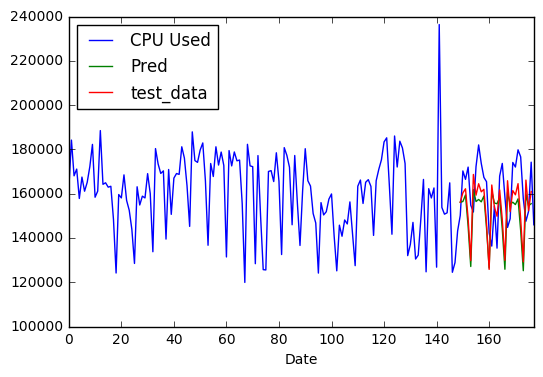

In [71]:
AutoRegressionCPU_Degree1_DatesAndDays_pred(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

In [80]:
#This is the autoregressive model of degree 1 with an indicator for week of the month as well
def AutoRegressionRAM_Degree1_DatesAndDays_WeekNo(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2['Date'] = pd.to_datetime(acc_daily2['Date'])
    acc_daily2['Monday'] = (acc_daily2['Date'].dt.weekday == 0).astype(int)
    acc_daily2['Tuesday'] = (acc_daily2['Date'].dt.weekday == 1).astype(int)
    acc_daily2['Wednesday'] = (acc_daily2['Date'].dt.weekday == 2).astype(int)
    acc_daily2['Thursday'] = (acc_daily2['Date'].dt.weekday == 3).astype(int)
    acc_daily2['Friday'] = (acc_daily2['Date'].dt.weekday == 4).astype(int)
    acc_daily2['Saturday'] = (acc_daily2['Date'].dt.weekday == 5).astype(int)
    acc_daily2['Sunday'] = (acc_daily2['Date'].dt.weekday == 6).astype(int)
    acc_daily2['Week 1'] = (((acc_daily2['Date'].dt.day - 1)/7 + 1).astype(int) == 1).astype(int)
    acc_daily2['Week 2'] = (((acc_daily2['Date'].dt.day - 1)/7 + 1).astype(int) == 2).astype(int)
    acc_daily2['Week 3'] = (((acc_daily2['Date'].dt.day - 1)/7 + 1).astype(int) == 3).astype(int)
    acc_daily2['Week 4'] = (((acc_daily2['Date'].dt.day - 1)/7 + 1).astype(int) == 4).astype(int)
    acc_daily2['Week 5'] = (((acc_daily2['Date'].dt.day - 1)/7 + 1).astype(int) == 5).astype(int)
    acc_daily2.drop(acc_daily2.columns[[1,2]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'RAM Used', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun', 'W1', 'W2', 'W3', 'W4', 'W5']
    rows, cols = acc_daily2.shape
    temp=acc_daily2.loc[1:rows-1, "RAM Used"]
    temp=temp.reset_index()
    temp.drop(temp.columns[[0]], axis=1, inplace=True)
    temp.loc[rows-1] = 0
    acc_daily2['RAM Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:14]
    train_label = acc_daily2.iloc[:divider, 14]
#We have -1 below because we don't have label value for the last entry
    test_data = acc_daily2.iloc[divider:rows-1, 0:14]
    test_label = acc_daily2.iloc[divider:rows-1, 14]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    print(lr.coef_)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    dates=range(divider,divider+diff-1,1)
    prediction_lr=pd.DataFrame()
    prediction_lr['Date']=dates
    prediction_lr['test_data']=lr.predict(test_data)
    new_pred = predictBasedOnPreviousPrediction_RAM(test_data, lr.coef_, lr.intercept_, divider, diff)
    old_pred = lr.predict(test_data)
    mo = math.sqrt(metrics.mean_squared_error(test_label, new_pred))
    print ("R^2 metric = %03.3f \t\t RMSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'RMSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff-1,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=lr.predict(test_data)
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='RAM Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    prediction_lr.plot(x='Date', y='test_data',ax=ax)
    plt.show()

[  0.41200205   0.84910595 -53.52372819  21.57219029   5.71142391
  17.47391489 -42.36854607 -10.3455729   61.48031806   6.23557497
  -1.95137396  19.32008466 -25.10977533   1.50548966]
R^2 metric = 0.653 		 RMSE = 71.6 
        R^2       RMSE
0  0.652771  71.605426
R^2      0.652771
RMSE    71.605426
dtype: float64


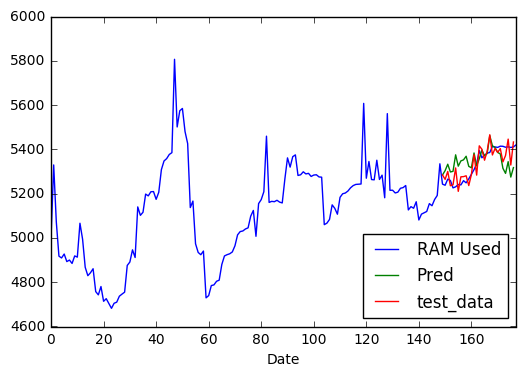

In [81]:
AutoRegressionRAM_Degree1_DatesAndDays_WeekNo(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

In [82]:
#This is the autoregressive model of degree 1
def AutoRegressionCPU_Degree1_DatesAndDays_WeekNo(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2['Date'] = pd.to_datetime(acc_daily2['Date'])
    acc_daily2['Monday'] = (acc_daily2['Date'].dt.weekday == 0).astype(int)
    acc_daily2['Tuesday'] = (acc_daily2['Date'].dt.weekday == 1).astype(int)
    acc_daily2['Wednesday'] = (acc_daily2['Date'].dt.weekday == 2).astype(int)
    acc_daily2['Thursday'] = (acc_daily2['Date'].dt.weekday == 3).astype(int)
    acc_daily2['Friday'] = (acc_daily2['Date'].dt.weekday == 4).astype(int)
    acc_daily2['Saturday'] = (acc_daily2['Date'].dt.weekday == 5).astype(int)
    acc_daily2['Sunday'] = (acc_daily2['Date'].dt.weekday == 6).astype(int)
    acc_daily2['Week 1'] = (((acc_daily2['Date'].dt.day - 1)/7 + 1).astype(int) == 1).astype(int)
    acc_daily2['Week 2'] = (((acc_daily2['Date'].dt.day - 1)/7 + 1).astype(int) == 2).astype(int)
    acc_daily2['Week 3'] = (((acc_daily2['Date'].dt.day - 1)/7 + 1).astype(int) == 3).astype(int)
    acc_daily2['Week 4'] = (((acc_daily2['Date'].dt.day - 1)/7 + 1).astype(int) == 4).astype(int)
    acc_daily2['Week 5'] = (((acc_daily2['Date'].dt.day - 1)/7 + 1).astype(int) == 5).astype(int)
    acc_daily2.drop(acc_daily2.columns[[1,3]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'CPU Used', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun', 'W1', 'W2', 'W3', 'W4', 'W5']
    rows, cols = acc_daily2.shape
    temp=acc_daily2.loc[1:rows-1, "CPU Used"]
    temp=temp.reset_index()
    temp.drop(temp.columns[[0]], axis=1, inplace=True)
    temp.loc[rows-1] = 0
    acc_daily2['CPU Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:14]
    train_label = acc_daily2.iloc[:divider, 14]
    test_data = acc_daily2.iloc[divider:rows-1, 0:14]
    test_label = acc_daily2.iloc[divider:rows-1, 14]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    print(lr.coef_)
    print(lr.residues_)
    print(lr.intercept_)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    dates=range(divider,divider+diff-1,1)
    prediction_lr=pd.DataFrame()
    prediction_lr['Date']=dates
    prediction_lr['test_data']=lr.predict(test_data)
    new_pred = predictBasedOnPreviousPrediction_CPU(test_data, lr.coef_, lr.intercept_, divider, diff)
    old_pred = lr.predict(test_data)
    mo = math.sqrt(metrics.mean_squared_error(test_label, new_pred))
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff-1,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=lr.predict(test_data)
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='CPU Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    prediction_lr.plot(x='Date', y='test_data',ax=ax)
    plt.show()

[ -7.61402245e+01   2.50162478e-01   2.00666279e+03   4.54030681e+03
   3.14508409e+03   6.07945557e+03  -8.71582895e+03  -2.31458169e+04
   1.60901366e+04   1.45176597e+02  -4.47275125e+03   4.57505749e+02
   1.26868030e+03   2.60138860e+03]
[]
125709.654024
R^2 metric = -0.132 		 MSE = 15612.4 
        R^2           MSE
0 -0.131667  15612.350774
R^2       -0.131667
MSE    15612.350774
dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


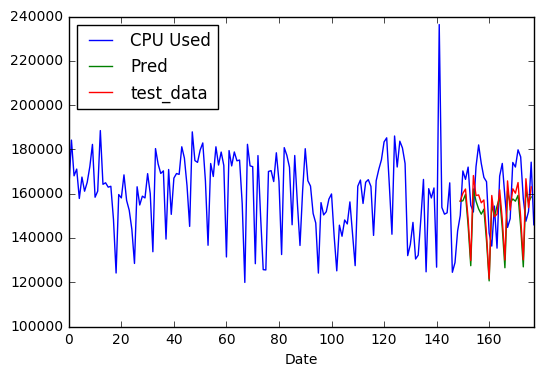

In [83]:
AutoRegressionCPU_Degree1_DatesAndDays_WeekNo(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')